In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.signal import hilbert

from synchronization import plots
from synchronization import processing
from synchronization import runner

# Synchronization

In a single network we want to quantify the amount of synchronization. 
In order to compare our results to Meng et al. we use phase synchronization.


### Baseline Model 

In [2]:
model = runner.run(modified_params={})

Initializing net ...
Initialization time: 0.3902411460876465s
==== Running Network ... ====
Starting simulation at t=0. s for a duration of 0.5 s
0.5 s (100%) simulated in 1s
INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
==== Network Run Finished ====
runtime: 10.0


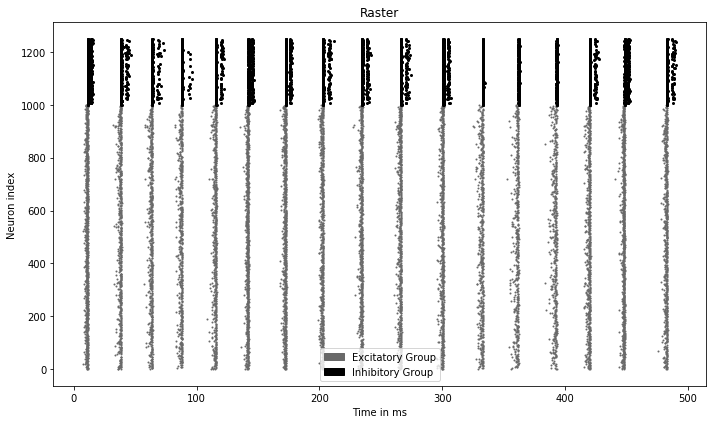

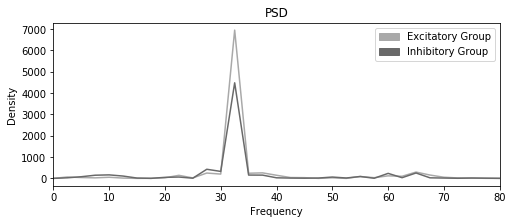

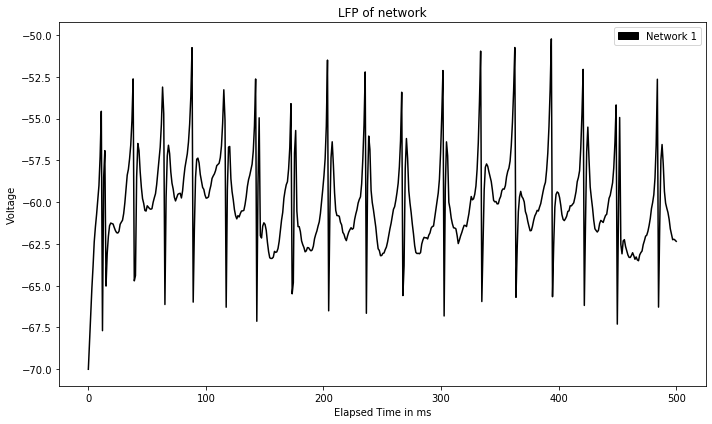

In [3]:
plots.raster(model)
plots.psd(model)
plots.lfp_nets(model, single_net=True)

In [17]:
neuron_1 = model['v_all_neurons_e'][0][:500] # only 2 neurons
neuron_2 = model['v_all_neurons_e'][1][:500] # only 2 neurons

neurons = model['v_all_neurons_e'][:500]

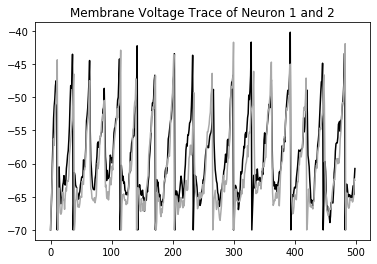

In [18]:
plt.title("Membrane Voltage Trace of Neuron 1 and 2")
plt.plot(neuron_1, c="black")
plt.plot(neuron_2, c="darkgrey")
plt.show()

### Phase Synchronization

* http://www.scholarpedia.org/article/Synchronization_measures#Phase_synchronization
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.hilbert.html


Phase difference (method1) of: 0.002611280132335836


Text(0.5, 1.0, 'Instantaneous Phase')

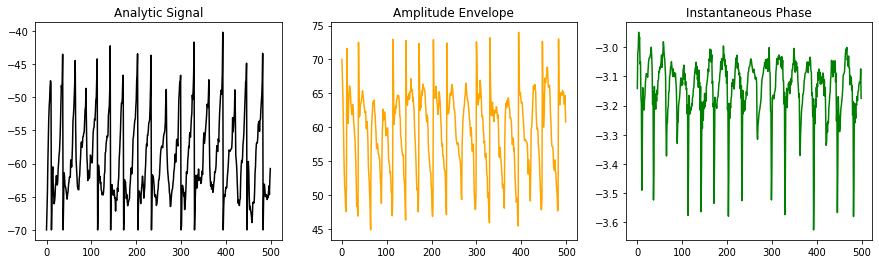

In [19]:
phase = processing.hilphase(neuron_1, neuron_2)
print("Phase difference (method1) of:", phase)

analytic_signal = hilbert(neuron_1)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].plot(analytic_signal, c='black')
axs[0].set_title("Analytic Signal")

axs[1].plot(amplitude_envelope, c='orange')
axs[1].set_title("Amplitude Envelope")

axs[2].plot(instantaneous_phase, c='green')
axs[2].set_title("Instantaneous Phase")


### Cross Correlate

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html

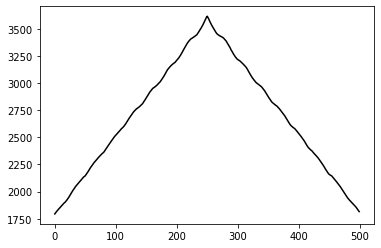

In [20]:
correlate = scipy.signal.correlate(neuron_1, neuron_2, mode='same') / neuron_1.shape[0]
plt.plot(correlate, c="black")

### Coherence

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.coherence.html

Text(0, 0.5, 'Coherence')

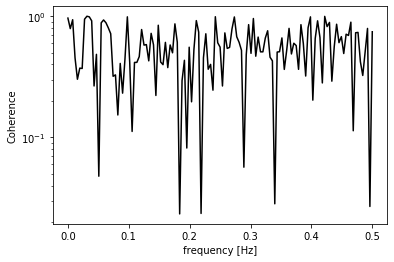

In [21]:
f, Cxy = scipy.signal.coherence(neuron_1, neuron_2)
plt.semilogy(f, Cxy, c="black")
plt.xlabel('frequency [Hz]')
plt.ylabel('Coherence')


### Local Order Parameter

We want to calculate the local order parameter as used in Meng et al. 2018 to measure synchronization within a network.
It is defined as the average phase of the neurons in a network. Each neuron corresponds to an oscillator. We get the phase of an oscillator by computing the analytical signal using the Hilbert transform.

Order parameter:

* $ r(t)e^{i\psi(t)} = \frac{1}{N} \sum^{N}_{\alpha = 1} e^{i\psi_k^{\alpha}(t)} $

### Phase Distribution and PLV

Below the distribution of the average phase of a neuron is shown.
The population is fairly synchronized as can be seen in the raster plot at the top.
Therefore, the distribution is also narrow.

In [22]:
plv = processing.phase_synchronization(neurons)
print(f"PLV of excitatory group {plv}")

PLV of excitatory group 0.9164895082718304


In [10]:
# TODO: plot phase distribution
